
# MNIST Dataset

![mnist_dataset](https://cdn-images-1.medium.com/max/1200/1*9Mjoc_J0JR294YwHGXwCeg.jpeg)

#### What is MNIST?
MNIST($M$odified $N$ational $I$nstitute of $S$tandards and $T$echnology) is a sub data set of NIST($N$ational $I$nstitute of $S$tandards and $T$echnology), a large database of handwritten digits. MNIST is used to train image processing systems and is basically the "hello world" of machine learning and computer vision.

MNIST（修改后的国家标准与技术研究所）是NIST（国家标准与技术研究所）的子数据集，是一个大型的手写数字数据库。 MNIST用于训练图像处理系统，基本上是机器学习和计算机视觉的“hello world”。

MNIST contains 60,000 training images and 10,000 testing images. Training images are used to train a system, and testing images are used to test the trained system.The images are grayscale, 28x28 pixels, and centered to reduce preprocessing and get started quicker. 

#### Where does the MNIST dataset come from?
The set of images in the MNIST database is a combination of two of NIST's databases: Special Database 1 and Special Database 3. Special Database 1 and Special Database 3 consist of digits written by high school students and employees of the United States Census Bureau, respectively.

#### What is Tensorflow and Keras?
Tensorflow is a popular software library for dataflow programming across a range of tasks. Tensorflow is open-source and is developed by the Google Brain Team. Tensorflow is a symbolic math library and is also used for machine learning applications such as neaural networks. I will be using Tensorflow's Python API but it is available for a range of languages.

Tensorflow是一个流行的软件库，用于跨一系列任务进行数据流编程。 Tensorflow是开源的，由Google Brain Team开发。 Tensorflow是一个符号数学库，也用于机器学习应用程序，如neaural网络。我将使用Tensorflow的Python API，但它可用于多种语言。 

Keras is an open source neural network library written in Python developed by a Google engineer: Francois Chollet. Keras acts like a "library on top of a library" as it is capable of running on top of MXNet, Deeplearning4j, Tensorflow, CNTK or Theano. Keras takes the functionality in core Tensorflow and adds a higher-level of abstraction to it, making it easier to experiment with deep neural networks.

Keras是一个用Python编写的开源神经网络库，由Google工程师Francois Chollet开发。 Keras就像一个“库顶部的库”，因为它能够在MXNet，Deeplearning4j，Tensorflow，CNTK或Theano之上运行。 Keras采用核心Tensorflow中的功能，并为其添加了更高级别的抽象，使得更容易实验深度神经网络。

***
## Now import the package for prepare the datasets

The gzip module provides the GzipFile class, as well as the open(), compress() and decompress() convenience functions. The GzipFile class reads and writes gzip-format files, automatically compressing or decompressing the data so that it looks like an ordinary file object.  

gzip.open($filename$, $mode$='rb', $compresslevel$=9, $encoding$=None, $errors$=None, $newline$=None)  
Open a gzip-compressed file in binary or text mode, returning a file object.

Download the MNIST Dataset File:  
http://yann.lecun.com/exdb/mnist/

![mnist](https://pic4.zhimg.com/80/v2-9c631455b6c2461b76e6abdf69befe33_hd.jpg)

The filename argument can be an actual filename (a str or bytes object), or an existing file object to read from or write to.

The mode argument can be any of 'r', 'rb', 'a', 'ab', 'w', 'wb', 'x' or 'xb' for binary mode, or 'rt', 'at', 'wt', or 'xt' for text mode. The default is 'rb'.

In [4]:
import gzip

# import tensorflow
import tensorflow as tf

import numpy as np
from keras.datasets import mnist

# Download MNIST Data 
from tensorflow.examples.tutorials.mnist import input_data

# y labels are oh-encoded
mnist = input_data.read_data_sets("data", one_hot=True) 

# Visualise data
import matplotlib.pyplot as plt
%matplotlib inline

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


***
## Now begin to read the MNIST dataset

In [5]:
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as test_img:
    test_images = test_img.read()
type(test_images)

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as test_lab:
    test_labels = test_lab.read()
type(test_labels)

bytes

In [6]:
# Get the first 4 bytes
test_images[0:4]

b'\x00\x00\x08\x03'

In [7]:
# 获得数据集的个数
# Get the number of the dataset
train_nums = mnist.train.num_examples
validation_nums = mnist.validation.num_examples
test_nums = mnist.test.num_examples
print('The number of the datasets: ')
print(' >>>train_nums = %d' % train_nums,'\n',
      '>>>validation_nums = %d'% validation_nums,'\n',
      '>>>test_nums = %d' % test_nums,'\n')

The number of the datasets: 
 >>>train_nums = 55000 
 >>>validation_nums = 5000 
 >>>test_nums = 10000 



In [8]:
# Get data value
# 所有训练数据
# all of the train data
train_data = mnist.train.images   
val_data = mnist.validation.images  #(5000,784)
test_data = mnist.test.images       #(10000,784)
print(' >>>The size of train_data：',train_data.shape,'\n',
      '>>>The size of one picture of train_data：',train_data[0].shape)

 >>>The size of train_data： (55000, 784) 
 >>>The size of one picture of train_data： (784,)


In [9]:
# Get label value.and one 1*10 is a vector 
# 获取标签值label=[0,0,...,0,1],是一个1*10的向量'''
# 所有训练数据
# All of the train labels
train_labels = mnist.train.labels     #(55000,10)
val_labels = mnist.validation.labels  #(5000,10)
test_labels = mnist.test.labels       #(10000,10)

# 输出训练集标签数组的大小，一幅图像的标签大小，一副图像的标签值
print(' >>>Training set labels array size：',train_labels.shape,'\n',
      '>>>Label size of an image：',train_labels[1].shape,'\n',
      '>>>Label value of an image：：',train_labels[0])

 >>>Training set labels array size： (55000, 10) 
 >>>Label size of an image： (10,) 
 >>>Label value of an image：： [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [10]:
# 批量获取数据和标签【使用next_batch(batch_size)】
#每次批量训练100幅图像
# Training 100 images in each batches
batch_size = 100    
# Use the mnist.train.next_batch(batch_size) for batch reading sample
# 使用mnist.train.next_batch(batch_size)批量读取样本
batch_xs,batch_ys = mnist.train.next_batch(batch_size)
print(' >>>Training 100 images in each batches: The data size =',batch_xs.shape,'\n',
      '>>>Training 100 images in each batches: The label size=',batch_ys.shape)
#xs是图像数据(100,784);ys是标签(100,10)


 >>>Training 100 images in each batches: The data size = (100, 784) 
 >>>Training 100 images in each batches: The label size= (100, 10)


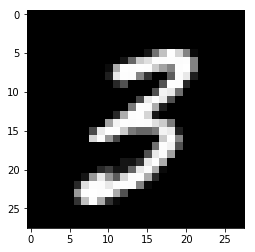

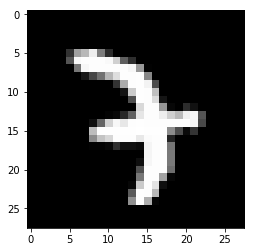

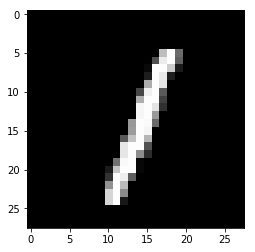

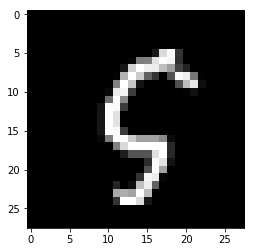

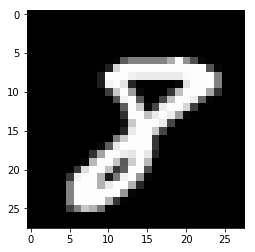

In [11]:
# 显示图像
# Display the images
plt.figure()
# Display the 5 images
for i in range(5):
    
    im = train_data[i].reshape(28,28)
    im = batch_xs[i].reshape(28,28)
    
    plt.imshow(im,'gray')
    # Pause for interval seconds.
    #If there is an active figure, 
    #it will be updated and displayed before the pause, 
    #and the GUI event loop (if any) will run during the pause.
    plt.pause(0.0000001)
plt.show()


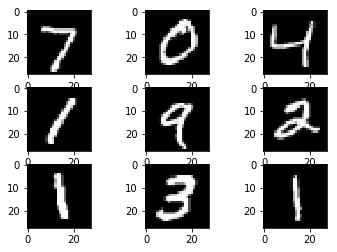

In [12]:
# Another way to display the images
from keras.datasets import mnist
# There are 2 tuples. The first tuple stores the images we have manually sorted.
# That means each image has its own corresponding label, which can be used for training.
# The second tuple stores images that we have not yet classified.
# After the first tuple is trained, we can classify the second tuple using a neural network.
# According to the actual value of the experimental results and our predicted values, the corresponding loss values are obtained.
# Reuse the back propagation for parameter update, then classify, and then repeat the above steps until the loss value is minimum
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 这里返回的是手写图片的两个tuple，第一个tuple存储的是我们已经人工分类好的图片，
# 也就是每一张图片都有自己对应的标签，然后可以拿来训练，
# 第二个tuple存储的是我们还没分类的图片，
# 在第一个tuple训练完后，我们可以把第二个tuple利用神经网络进行分类，
# 根据实验结果的真实值与我们的预测值进行对比得到相应的损失值，
# 再利用反向传播进行参数更新，再进行分类，然后重复前述步骤直至损失值最小

# The function is to determine the position of the image and the number of images. 
# The first two 3 means that 9 images can be placed
# If it becomes 221, you can put 4 pictures, 
#then the next one is to determine the position of the image, in the first one, the following subplot is the same.
plt.subplot(331)
# subplot函数的作用是确定图像的位置以及图像的个数，前两个3的意思是可以放9张图片，
# 如果变成221的话，就是可以放4张图片，然后后面的1，是确定图像的位置，处于第一个，以下的subplot同理

# 这里个把图片显示出来
# X_train存储的是图像的像素点组成的list数据类型，
# 这里面又由一个二维的list（28 x 28的像素点值）和一个对应的标签list组成，
# y_train存储的是对应图像的标签，也就是该图像代表什么数字
# Display the images
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))

plt.subplot(332)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(333)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(334)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(335)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(336)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(337)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(338)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(339)
plt.imshow(X_train[8], cmap=plt.get_cmap('gray'))
#我们这里第一个参数是图片的像素点值组成的数组（列表），第二个参数是指明图片的色彩

***
## Save the images

In [13]:
# dawnload the MNIST dataset again
mnist = input_data.read_data_sets("/data/",one_hot=True)
# import the package for save the array to the folder
import scipy.misc
# Document System package
import os
save_dir = '\GMIT2018-2019\Emerging-Thecnology-Project\img\ ' 
# Determine if the file path exists.
if os.path.exists(save_dir) is False:
    # Create the file path if it does not exist
    os.makedirs(save_dir)
# Save the 20 images 
for i in range(20):
    image = mnist.train.images[i,:]
    # Set the image size
    image = image.reshape(28,28)
    file = save_dir+'mnist_train_%d.jpg' % i
    scipy.misc.toimage(image,cmin=0.0,cmax=1.0).save(file)

Extracting /data/train-images-idx3-ubyte.gz
Extracting /data/train-labels-idx1-ubyte.gz
Extracting /data/t10k-images-idx3-ubyte.gz
Extracting /data/t10k-labels-idx1-ubyte.gz


C:\Users\kyle\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


***
## Resource:  
https://en.wikipedia.org/wiki/TensorFlow  
https://en.wikipedia.org/wiki/Keras  
http://yann.lecun.com/exdb/mnist/  
https://en.wikipedia.org/wiki/MNIST_database  
https://blog.csdn.net/panrenlong/article/details/81736754  
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pause.html  
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow  
https://www.cnblogs.com/dudu1992/p/8908178.html  

# End